# Data Visualization

#### 1. Import Files
#### 2. EDA & Descriptive Analysis
#### 3. Export Images

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import Files

In [2]:
# Import Data

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 4/Instacart Basket Analysis/'

df_ords_cx = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cx_merge.pkl'))

In [3]:
df_ords_cx.shape

(32404859, 31)

In [4]:
df_ords_cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   number_of_orders        int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  average_spend           float64
 20  spender_flag            object 
 21  customer_frequency      float

# 2. EDA & Descriptive Analysis

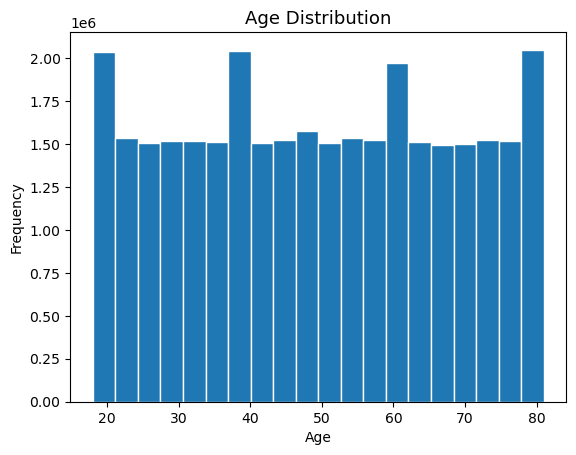

In [5]:
# Age Distribution Histogram

df_ords_cx['age'].plot.hist(bins = 20, xlabel = 'Age', edgecolor='white')
plt.title('Age Distribution', fontsize = 13)

# Show the graph

plt.show()

In [6]:
# Dependants (value_counts)

df_ords_cx['dependants'].value_counts(dropna = False)

dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

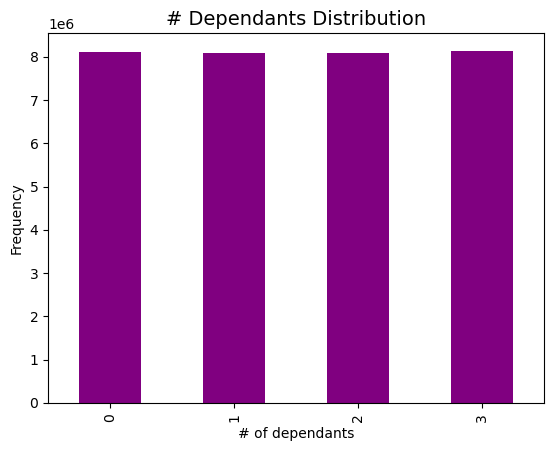

In [7]:
# Dependants Histogram

df_ords_cx['dependants'].value_counts(dropna = True).sort_index().plot.bar(color = ['purple'], ylabel = 'Frequency', xlabel='# of dependants')
plt.title('# Dependants Distribution', fontsize = 14)

# Show the graph

plt.show()

In [9]:
# Familial Status

df_ords_cx['fam_status'].value_counts(dropna = False)

fam_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

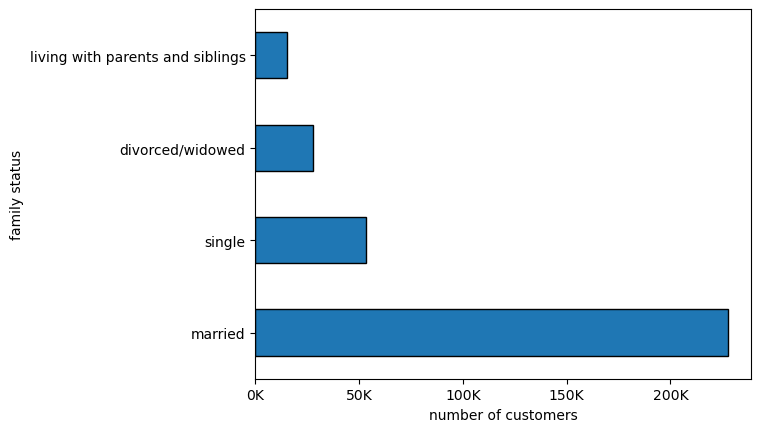

In [11]:
# Familial Status Bar Chart

fam_status = df_ords_cx['fam_status'].value_counts(dropna = False).plot.barh(xlabel = "number of customers", ylabel = 'family status', edgecolor='black')

# Change X/Y Axis + Show Total Number of Customers

fam_status.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100000,'1.00f')+'K'))

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/fam_status_barh.png'))

# Show the graph

plt.show()

### 2.1 Income Analysis

In [12]:
# Income

df_ords_cx['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [13]:
# Income Median

df_ords_cx['income'].median()

96618.0

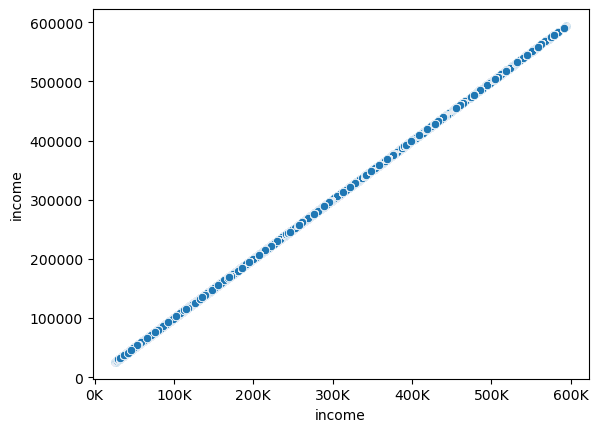

In [14]:
# Income Scatterplot to identify any outliers

income_scatt = sns.scatterplot(x = "income", y = "income", data = df_ords_cx)

# Formats x-axis as K (thousands)

income_scatt.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000,'1.00f')+'K'))

# Show the graph

plt.show()

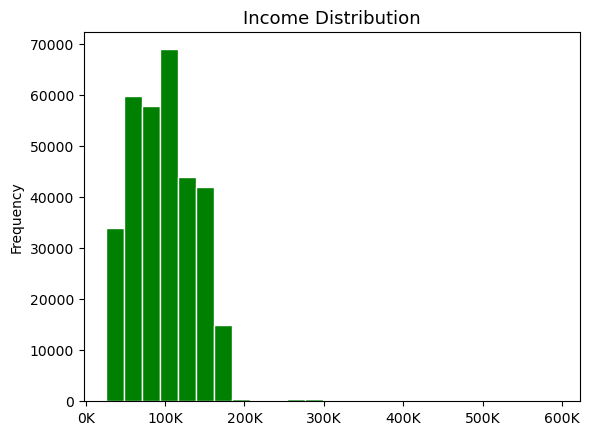

In [19]:
# Income Histogram

income_distri = df_ords_cx['income'].plot.hist(bins = 25, edgecolor='white', color = ['green'])
plt.title('Income Distribution', fontsize = 13)

# Format x-axis as K (thousands)

income_distri.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000,'1.00f')+'K'))

# Format y-axis (thousands)

income_distri.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100,'1.00f')))

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/income_distribution.png'))

# Show the graph

plt.show()

In [20]:
# Highest Income Overview

df_check_income = df_ords_cx[df_ords_cx['income'] > 300000]
df_check_income.sort_values(by = 'income', ascending = True)

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,dependants,fam_status,income
30537993,748328,200930,2,3,21,8.0,34063.0,17.0,0.0,Medium Roast Original Blend Ground Coffee,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538004,748328,200930,2,3,21,8.0,23892.0,15.0,0.0,Original High Efficiency Liquid Laundry Detergent,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538003,2257650,200930,1,2,15,NaN,1599.0,12.0,0.0,Cottonelle Fresh Care Flushable Cleansing Cloths,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538002,2257650,200930,1,2,15,NaN,39374.0,15.0,0.0,Sea Salt,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538001,2257650,200930,1,2,15,NaN,18296.0,13.0,0.0,Natural Applesauce,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329004,1589272,58596,61,2,20,5.0,20463.0,13.0,1.0,Organic Fat-Free Milk,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901
6329003,744856,58596,38,3,17,2.0,20463.0,4.0,1.0,Organic Fat-Free Milk,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901
6329002,2050036,58596,34,2,12,16.0,20463.0,13.0,1.0,Organic Fat-Free Milk,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901
6329011,3305346,58596,35,1,7,6.0,42731.0,11.0,1.0,Original Citrus Sparkling Flavored Soda,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901


### 2.2 Orders DOW Analysis

In [21]:
# Count rows for each day of the week

df_ords_cx['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

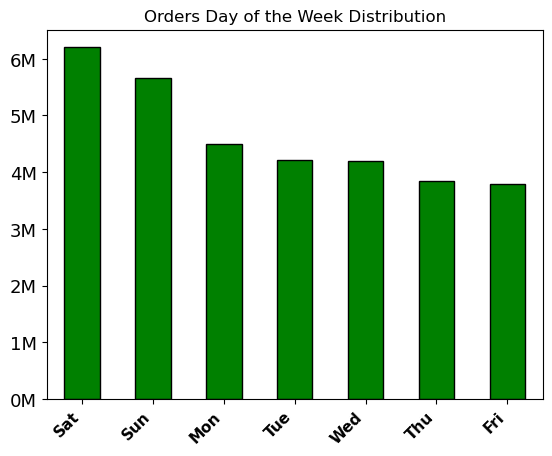

In [22]:
# Bar chart of 'orders_day_of_week' -> Value counts sorted by largest to smallest


# Format x-axis

ax_week = df_ords_cx['orders_day_of_week'].value_counts().plot.bar(title = 'Orders Day of the Week Distribution', fontsize = 13, color = ['green'], edgecolor='black', xlabel = '')

bars = ('Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri')
y_pos = np.arange(len(bars))

# Use the plt.xticks function to custom labels

plt.xticks(y_pos, bars, color = 'black', rotation = 45, fontweight='bold', fontsize = '11', horizontalalignment='right')

# Formats y-axis as M (millions)

ax_week.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/weekly_orders_by_day.png'))

# Show the graph

plt.show()

### 2.3 Price Distribution Analysis

#### Histogram of Prices using 80 bins

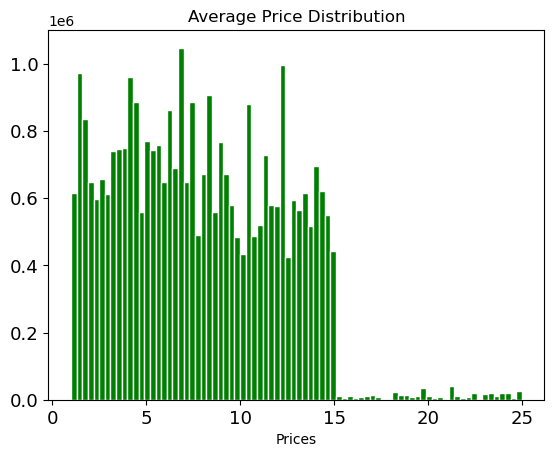

In [23]:
# Creating 'Average Pricing' Histogram


bar_prices = df_ords_cx['prices'].plot.hist(title = 'Average Price Distribution', fontsize = 13, bins = 80, xlabel = 'Prices', ylabel='', edgecolor='white', color = ['green'])

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/prices_hist.png'))

# Show the graph

plt.show()

#### Histogram of Prices using 25 bins

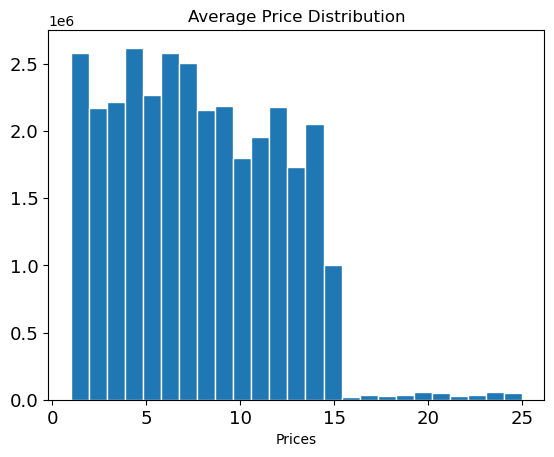

In [24]:
# Creating 'Average Pricing' Histogram


bar_prices_2 = df_ords_cx['prices'].plot.hist(title = 'Average Price Distribution', fontsize = 13, bins = 25, xlabel = 'Prices', ylabel='', edgecolor='white')

# Show the graph

plt.show()

### 2.4 Price vs. Orders DOW Analysis

In [25]:
#### Dataframe Split 70/30

#create the random seed so its replicable
np.random.seed(4)

# Create a list holding Trrue/False values to the test np.random.rand() <=0.7
dev = np.random.rand(len(df_ords_cx)) <= 0.7

In [26]:
# Store 70% of the sample in the dataframe big

big = df_ords_cx[dev]

In [27]:
# Store 30% of the sample in the dataframe small

small = df_ords_cx[~dev]

In [28]:
# Check df_ords_cx length

len(df_ords_cx)

32404859

In [29]:
# Check the sample length

big_len = len(big)
small_len = len(small)

big_len + small_len

32404859

In [30]:
# Determine an accurate representation of the original df

df_2 = small[['orders_day_of_week','prices']]

# Check Output

df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


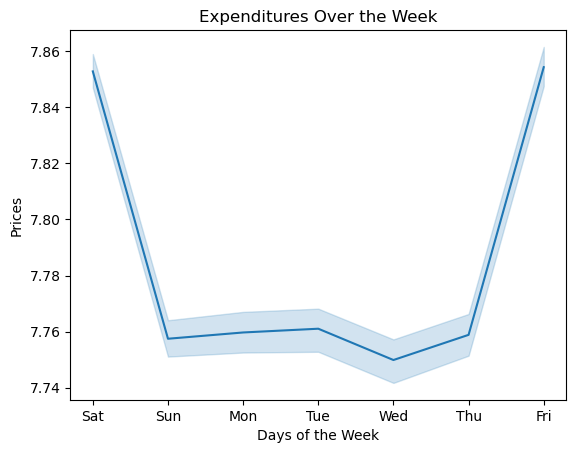

In [33]:
# Create Line chart

# x-axis values for plotting
x = [0, 1, 2, 3, 4, 5, 6]

# labels for x-axis
labels = ["Sat", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri"]
 
# setting x-axis values
plt.xticks(x, labels)

line_week = sns.lineplot(data = df_2, x ='orders_day_of_week', y = 'prices').set(title = 'Expenditures Over the Week', xlabel = 'Days of the Week',  ylabel = 'Prices')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/orders_days_vs_prices.png'))

# Show the graph

plt.show()

In [34]:
# Highest Income Overview -> Sample Dataframe

df_check_income = small[small['income'] > 300000]
df_check_income.sort_values(by = 'income', ascending = True)

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,dependants,fam_status,income
30538022,2756185,200930,4,4,18,30.0,27746.0,13.0,0.0,The Original Coney Island Natural Casing Beef ...,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538015,748328,200930,2,3,21,8.0,11081.0,3.0,1.0,Sweet Sliced Apples,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538014,2257650,200930,1,2,15,NaN,11081.0,17.0,0.0,Sweet Sliced Apples,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538013,2756185,200930,4,4,18,30.0,217.0,19.0,0.0,"String Cheese, Mozzarella",...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
30538003,2257650,200930,1,2,15,NaN,1599.0,12.0,0.0,Cottonelle Fresh Care Flushable Cleansing Cloths,...,30.0,non_frequent_customer,Charles,Nichols,Male,South Carolina,60,1,married,300913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329096,32282,58596,6,1,11,5.0,23763.0,3.0,1.0,French Vanilla Sugar Free Liquid Coffee Creamer,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901
6329088,1859822,58596,28,4,8,2.0,17734.0,4.0,1.0,Gluten Free Soy Sauce Tamari Lite,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901
6329087,2976644,58596,7,3,12,2.0,17734.0,3.0,0.0,Gluten Free Soy Sauce Tamari Lite,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901
6329154,2663684,58596,30,3,20,2.0,34861.0,2.0,1.0,Beets Bunch,...,4.0,frequent_customer,Thomas,Cohen,Male,Washington,75,2,married,593901


### 2.5 Order Hour of Day Analysis

In [35]:
# Dataframe Overview

df_ords_cx.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,20.5,non_frequent_customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,20.5,non_frequent_customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


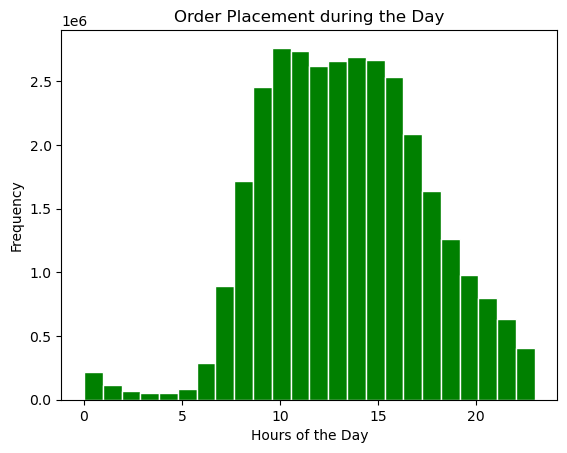

In [39]:
# Histogram 'order_hour_of_day'


df_ohod = df_ords_cx[['order_hour_of_day']]
hist_ohod = df_ohod['order_hour_of_day'].plot.hist(title = 'Order Placement during the Day', bins = 24, xlabel = 'Hours of the Day', ylabel ='Frequency', edgecolor='white', color = ['green'])

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/orders_hours_distribution.png'))

# Show the graph

plt.show()

#### Summary:

1. Peak hours for order is between 10 am - 4 pm
2. Most orders are made at 10 am, 11 am and 2 pm
3. Off peak hours (minimum orders) are between 12 am and 5 am

In [40]:
df_ohod['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

#### *Histogram 'order_hour_of_day' -> Subset 'small'*

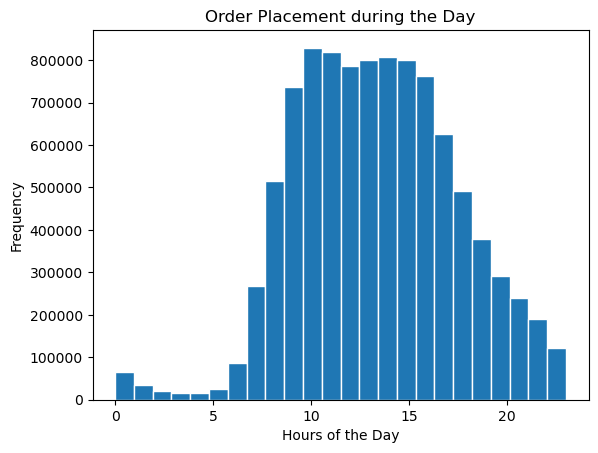

In [41]:
df_ohod_small = small[['order_hour_of_day']]
hist_ohod_small = df_ohod_small['order_hour_of_day'].plot.hist(title = 'Order Placement during the Day', bins = 24, xlabel = 'Hours of the Day', ylabel ='Frequency', edgecolor='white')

In [42]:
df_ohod_small['order_hour_of_day'].value_counts()

order_hour_of_day
10    829016
11    819830
14    806654
15    799957
13    798982
12    785868
16    761607
9     736231
17    626387
8     513977
18    490574
19    377417
20    292048
7     266836
21    238867
22    189839
23    120830
6      87456
0      65629
1      34773
5      26361
2      20736
4      15968
3      15255
Name: count, dtype: int64

### 2.6 Customer Loyalty Types

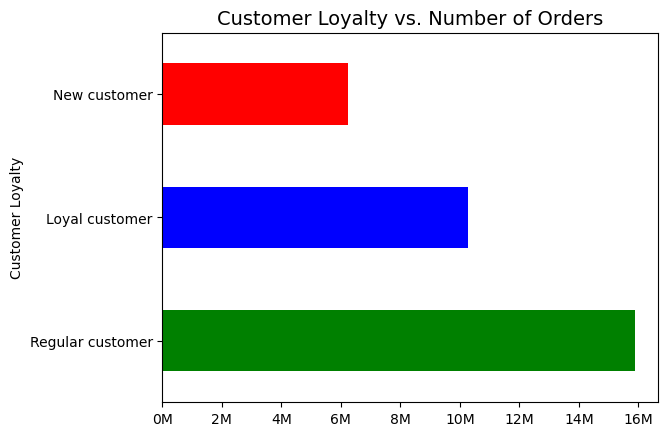

In [43]:
# Horizontal bar graph loyalty flag vs. count of orders per loyalty flag

bar_loyal = df_ords_cx['loyalty_flag'].value_counts().plot.barh(ylabel = "Customer Loyalty", x = "Number of Orders", color = ['green', 'blue', 'red'])

plt.title("Customer Loyalty vs. Number of Orders", fontsize = 14)
bar_loyal.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/orders_by_loyalty.png'))

# Show the graph

plt.show()

In [44]:
# Check order count by loyalty flags

df_ords_cx['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [45]:
# Percentages Calculation by customer loytalty type

print("Regular Customer: " + str((15876776 / (15876776+10284093+6243990)*100)) + "%")
print("Loyal Customer: " + str((10284093 / (15876776+10284093+6243990)*100)) + "%")
print("New Customer: " + str((6243990 / (15876776+10284093+6243990)*100)) + "%")

Regular Customer: 48.995047316823694%
Loyal Customer: 31.736268317044676%
New Customer: 19.268684366131637%


#### Summary:

1. Loyalty customers represent 32% of all orders
2. Regular customers are the highest group with most orders (49%)
3. New customers are the lowest group in terms of orders (19%)

#### *Subset 'small': Horizontal bar graph loyalty flag vs. count of orders per loyalty flag*

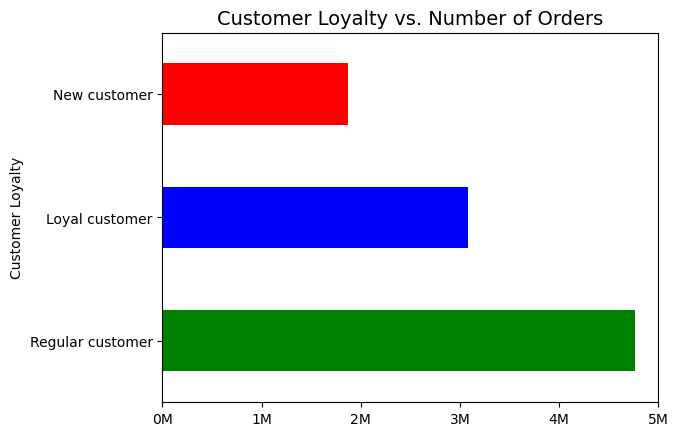

In [46]:
bar_loyal_small = small['loyalty_flag'].value_counts().plot.barh(ylabel = "Customer Loyalty", x = "Number of Orders", color = ['green', 'blue', 'red'])

plt.title("Customer Loyalty vs. Number of Orders", fontsize = 14)
bar_loyal_small.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

In [47]:
small['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    4762632
Loyal customer      3083573
New customer        1874893
Name: count, dtype: int64

In [48]:
print("Regular Customer: " + str((4762632 / (4762632+3083573+1874893)*100)) + "%")
print("Loyal Customer: " + str((3083573 / (4762632+3083573+1874893)*100)) + "%")
print("New Customer: " + str((1874893 / (4762632+3083573+1874893)*100)) + "%")

Regular Customer: 48.992737240175956%
Loyal Customer: 31.72041882511626%
New Customer: 19.286843934707786%


### 2.7 Order Hours of Day vs. Prices Analysis

In [49]:
#### Extract 'order_hour_of_day' and 'prices' from sample "small" df

small_ohod_prices = small[['order_hour_of_day', 'prices']]

# Check Output

small_ohod_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


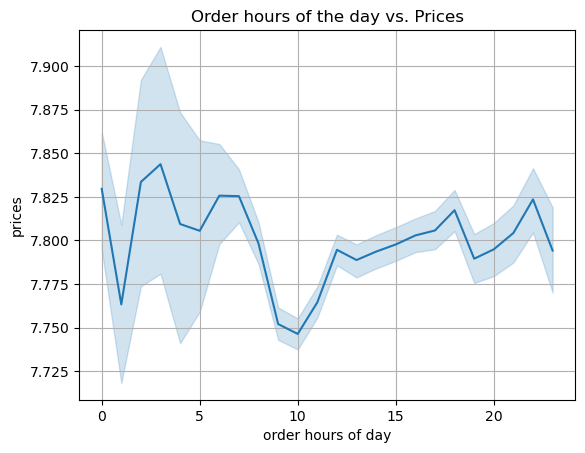

In [50]:
#### Line graph 'order_hour_of_day' vs. 'prices'

line_ohod_prices = sns.lineplot(data = small_ohod_prices, x = 'order_hour_of_day', y = 'prices')
line_ohod_prices.set(xlabel = 'order hours of day')
plt.title('Order hours of the day vs. Prices')
plt.grid()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/orders_by_hour_prices.png'))

# Show the graph

plt.show()

#### Summary:

1. Expenses are highest at 4 am
2. Overall expenses are higher between 10 pm and 7 am, with peaks at 10 pm, 1 am, 4 am and 7 am

### 2.8 Age vs. Dependants

In [51]:
# Group 'age' and 'dependants' into a dataframe

df_age_dependants = df_ords_cx[['age','dependants']]

# Check Output

df_age_dependants.head()

,age,dependants
0,31,3
1,31,3
2,31,3
3,31,3
4,31,3


/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


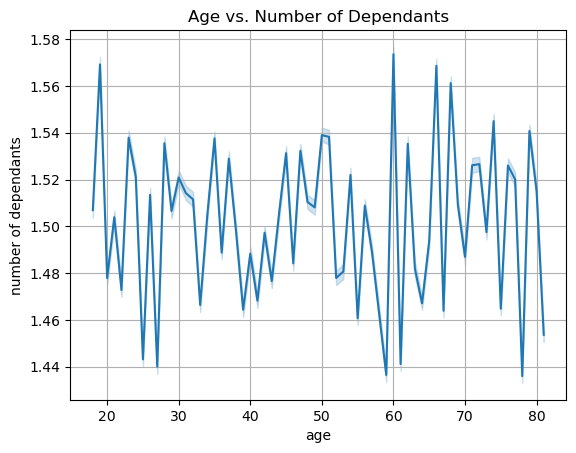

In [52]:
# Create a line graph to check for correlation between 'age' and 'dependants'

line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'dependants')
line_age_dependants.set(xlabel = 'age', ylabel = 'number of dependants')
plt.title('Age vs. Number of Dependants')
plt.grid()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/line_age_dependants.png'))

# Show the graph

plt.show()

#### Insight: 

There is no correlation between the age and the number of dependants

#### *Subset 'small': Group 'age' and 'dependants' into a dataframe*

In [53]:
df_small_age_dependants = small[['age','dependants']]

# Check Output

df_small_age_dependants.head()

,age,dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


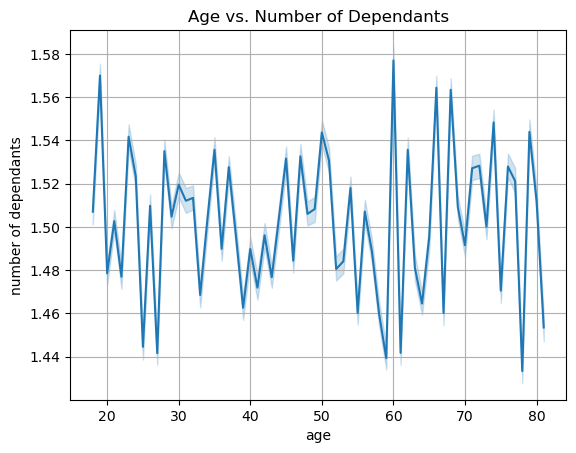

In [54]:
# Create a line graph to check for correlation between 'age' and 'dependants'

line_small_age_dependants = sns.lineplot(data = df_small_age_dependants, x = 'age', y = 'dependants')
line_small_age_dependants.set(xlabel = 'age', ylabel = 'number of dependants')
plt.title('Age vs. Number of Dependants')
plt.grid()

# Show the graph

plt.show()

In [55]:
#### Number of customers by family status using bar graph ('fam_status' and 'user_id')

df_fam_status_dependants = df_ords_cx[['fam_status','user_id']]
df_fam_status_dependants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   fam_status  object
 1   user_id     int64 
dtypes: int64(1), object(1)
memory usage: 494.5+ MB


In [56]:
## Unique users count per 'fam_status'

fam_users_nb = df_fam_status_dependants.groupby(['fam_status'], as_index = False).agg({'user_id': 'nunique'})

# Check Output

fam_users_nb

,fam_status,user_id
0,divorced/widowed,17640
1,living with parents and siblings,9701
2,married,144906
3,single,33962


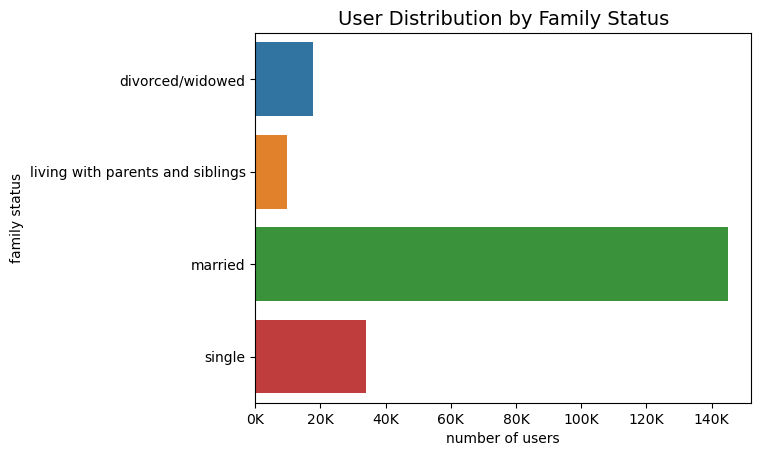

In [57]:
# Create a bar graph to show the user distribution based on family status

bar_fam_users = sns.barplot(y = 'fam_status', x = 'user_id', data = fam_users_nb)
bar_fam_users.set(ylabel = 'family status', xlabel = 'number of users')
plt.title('User Distribution by Family Status', fontsize = 14)

# Formats x-axis as K (thousands)

bar_fam_users.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000,'1.00f')+'K'))

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam_users.png'))

# Show the graph

plt.show()

#### Insight: Family Status vs. Number of Dependants

- Highest group are married users
- Second group are singles

#### *Subset 'small': Number of customers by family status using bar graph ('fam_status' and 'user_id')*

In [58]:
small_fam_status_dependants = small[['fam_status','user_id']]
small_fam_status_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   fam_status  object
 1   user_id     int64 
dtypes: int64(1), object(1)
memory usage: 222.5+ MB


In [59]:
small_fam_users_nb = small_fam_status_dependants.groupby(['fam_status'], as_index = False).agg({'user_id': 'nunique'})

# Check Output

small_fam_users_nb

,fam_status,user_id
0,divorced/widowed,17584
1,living with parents and siblings,9672
2,married,144414
3,single,33838


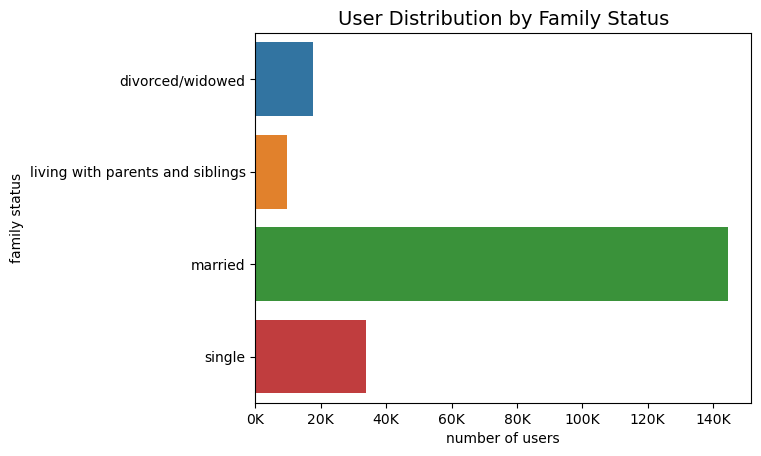

In [60]:
small_bar_fam_users = sns.barplot(y = 'fam_status', x = 'user_id', data = small_fam_users_nb)
small_bar_fam_users.set(ylabel = 'family status', xlabel = 'number of users')
plt.title('User Distribution by Family Status', fontsize = 14)

# Formats x-axis as K (thousands)

small_bar_fam_users.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: format(x/1000,'1.00f')+'K'))

# Show the graph

plt.show()

### 2.9 Age vs. Income (Spending Power)

In [61]:
# Group 'age' and 'income' into a dataframe

df_age_income = df_ords_cx[['age', 'income']]

# Check Output
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


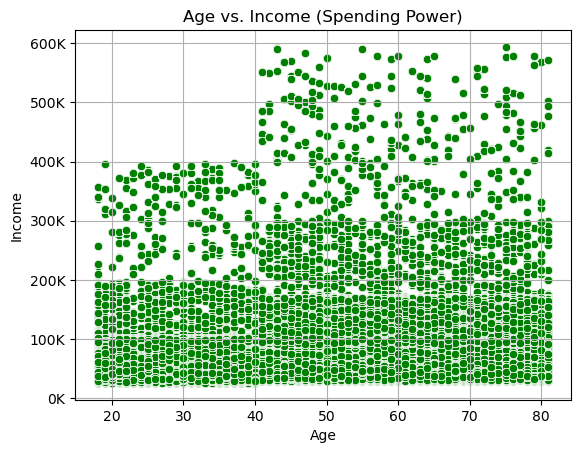

In [62]:
#### Scatterplot: Age vs. Income

scatt_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income, color = ['green'])
plt.title('Age vs. Income (Spending Power)')
scatt_age_income.set(xlabel = 'Age', ylabel = 'Income')
plt.grid()

# Formats y-axis as K (thousands)

scatt_age_income.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/1000,'1.00f')+'K'))

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/scatt_age_income.png'))

# Show the graph

plt.show()

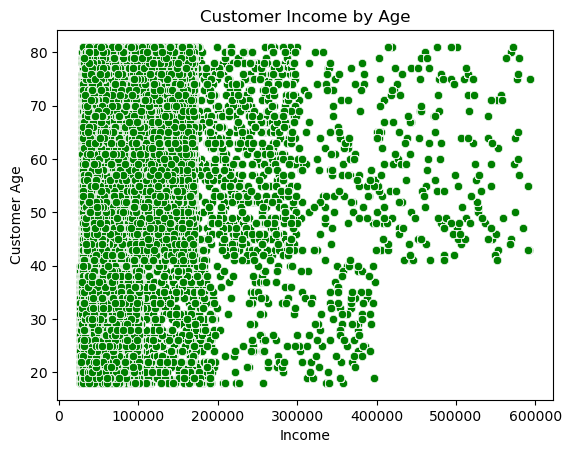

In [63]:
# Creating new scatterplot for Age vs. Income with new axis + save it as PNG

cx_income_by_age = sns.scatterplot(data = df_age_income, x = 'income', y = 'age', color='green').set(title='Customer Income by Age',xlabel = 'Income', ylabel = 'Customer Age')

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/cx_income_by_age.png'))

# Show the graph

plt.show()

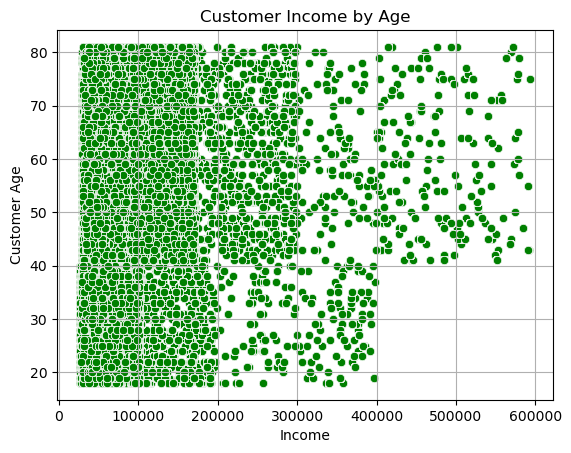

In [64]:
# Creating new scatterplot for Age vs. Income with new axis + save it as PNG

cx_income_by_age_grid = sns.scatterplot(data = df_age_income, x = 'income', y = 'age', color='green').set(title='Customer Income by Age',xlabel = 'Income', ylabel = 'Customer Age')

plt.grid()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/cx_income_by_age_grid.png'))

# Show the graph

plt.show()

#### Insights:

1. Customers aged between 18 to 40 have lower spending power compared to people above 40 years old
2. Customers between 18 and 40 have income less than 400K: Larger subset of customers have less than 200K
3. Customers above 40 surpass 400K and earn up to 600K